# Transformasi Linear 2D dengan JAX

Selamat datang di notebook tentang **Transformasi Linear**. Dalam matematika dan grafika komputer, transformasi linear adalah fondasi dari segala hal mulai dari pemrosesan gambar hingga pelatihan model AI (seperti Transformer dalam LLM).

Dalam notebook ini, kita akan mempelajari:
1. **Vektor Basis**: Memahami bagaimana ruang 2D dibangun oleh unit vektor $\hat{i} (1,0)$ dan $\hat{j} (0,1)$.
2. **Matriks sebagai Pemetaan**: Bagaimana satu matriks tunggal dapat memutar, menarik, dan mengubah seluruh semesta koordinat kita.
3. **Implementasi JAX**: Menggunakan efisiensi array JAX untuk melakukan operasi matriks pada ribuan titik sekaligus.

### Mengapa Belajar Transformasi Linear?
Setiap kali Anda memutar foto di ponsel, melakukan zooming, atau bahkan saat sebuah neural network memproses 'feature maps', Anda sedang menggunakan transformasi linear. Mari kita mulai dengan mempersiapkan lingkungan kita.

In [15]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

# Load libraries
import jax.numpy as jnp
import jax
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [16]:
# Set style (needs to be in a new cell)
set_default()

In [17]:
print(f"JAX devices: {jax.devices()}")

JAX devices: [CpuDevice(id=0)]


### Langkah 1: Menghasilkan Datapoints Acak

Kita akan membuat awan titik (cloud of points) yang tersebar secara normal di ruang 2D. Setiap titik mewakili koordinat $(x, y)$.

In [18]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
X = jax.random.normal(subkey, (1000, 2))
print(f"X: {X}")
print(f"X shape: {X.shape}")

X: [[-2.4424558  -2.0356805 ]
 [ 0.20554423 -0.3535502 ]
 [-0.76197404 -1.1785518 ]
 ...
 [ 0.02001414 -0.61119574]
 [ 0.8606195  -0.6780833 ]
 [ 1.2592916  -1.3961211 ]]
X shape: (1000, 2)


In [19]:
colors = X[:, 0]

### Langkah 2: Memahami Vektor Basis

Di dunia koordinat standar, kita memiliki dua pilar:
- $\hat{i}$ (vektor basis x): Berjalan satu langkah ke kanan dari pusat $(0,0)$.
- $\hat{j}$ (vektor basis y): Berjalan satu langkah ke atas dari pusat $(0,0)$.

Setiap titik dalam grafik kita hanyalah kombinasi dari dua vektor basis ini. Mari kita definisikan mereka dan visualisasikan awan titik awal kita.

In [20]:
# Define base vectors
OI = jnp.array([[0, 0], [0, 0], [1, 0], [0, 1]], dtype=jnp.float32)

Matriks `OI` di bawah ini mendefinisikan origin dan target dari vektor basis kita sehingga kita bisa menggambarnya sebagai panah merah (x) dan biru (y).

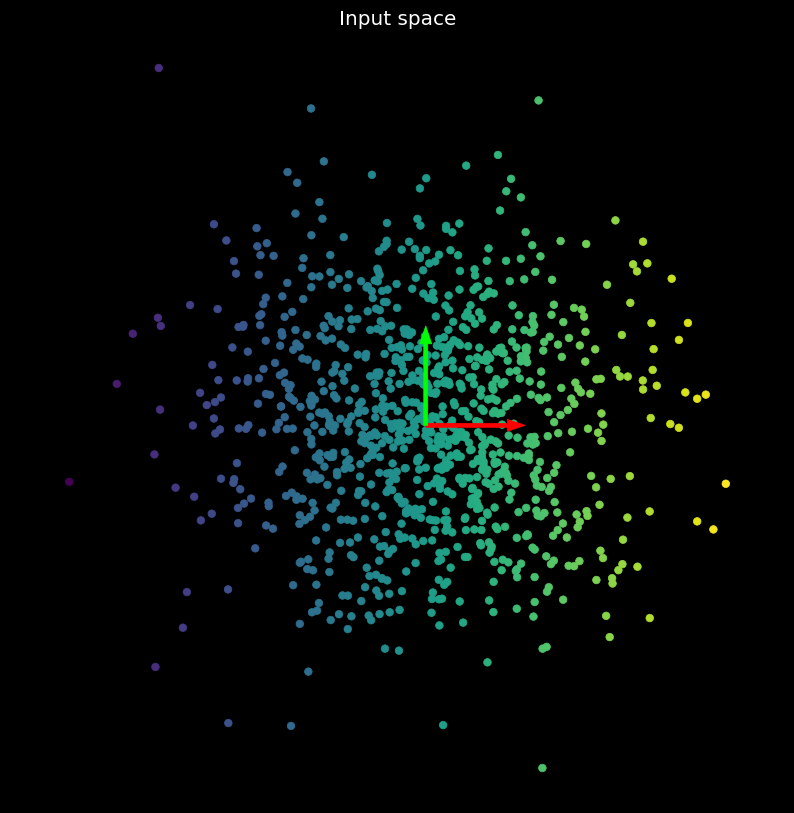

In [21]:
show_scatterplot(X, colors, title='Input space')
plot_bases(OI)

### Transformasi Linear: $\mathcal{T}(\mathbf{x}) = \mathbf{Ax}$

#### Perkalian Matriks sebagai Operator Linear

Dalam aljabar linear, transformasi linear dapat direpresentasikan sebagai perkalian matriks. Jika kita memiliki vektor $v$ dan matriks transformasi $A$, maka vektor baru $v'$ hasil transformasi adalah:

$$v' = A v$$

Di bawah ini, kita mendefinisikan matriks transformasi `A` dan menerapkannya pada data `X` via `X @ A.T` (karena data kita berbentuk baris).

## Langkah 3: Menerapkan Transformasi Linear

Sekarang saatnya bagian yang menarik! Sebuah transformasi linear didefinisikan oleh **Matriks Transformasi**. 

Bayangkan matriks ini sebagai 'penguasa' baru yang memberitahu ke mana vektor basis harus pergi. Jika kita tahu ke mana $\hat{i}$ dan $\hat{j}$ dipindahkan, kita tahu ke mana **seluruh ruang** akan bergerak.

### Kasus 1: Penskalaan (Scaling)
Kita akan mulai dengan matriks yang melipatgandakan ukuran segalanya:
$$ A = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} $$
Artinya $\hat{i}$ lama $(1,0)$ menjadi $(2,0)$ dan $\hat{j}$ lama $(0,1)$ menjadi $(0,2)$.

### Perkalian Matriks: Memindahkan Titik

Di JAX, kita menggunakan operator `@` (atau `jnp.matmul`) untuk menerapkan transformasi. Ingat:
- Untuk satu vektor $v$, transformasi dilakukan dengan $Av$.
- Untuk ribuan titik $X$ sekaligus, kita bisa melakukannya dengan $X A^T$.

In [22]:
# Transformation matrix
A = jnp.array([
    [-1, 2],
    [3, 1]
], dtype=jnp.float32)

Y = X @ A.T  # Applying horizontal vector transformation: y' = x A^T
print(Y.shape)

(1000, 2)


In [23]:
# Apply transformation to base vectors
OI_new = OI.at[2:].get() @ A.T
OI_new = jnp.vstack([OI[:2], OI_new])

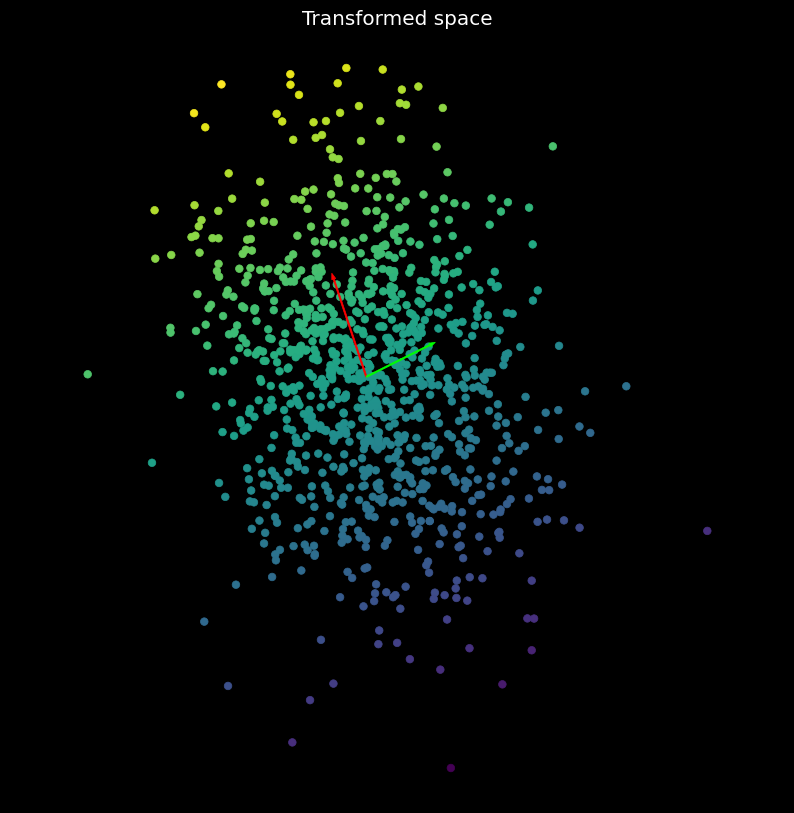

In [24]:
show_scatterplot(Y, colors, title='Transformed space')
plot_bases(OI_new)

### Scaling

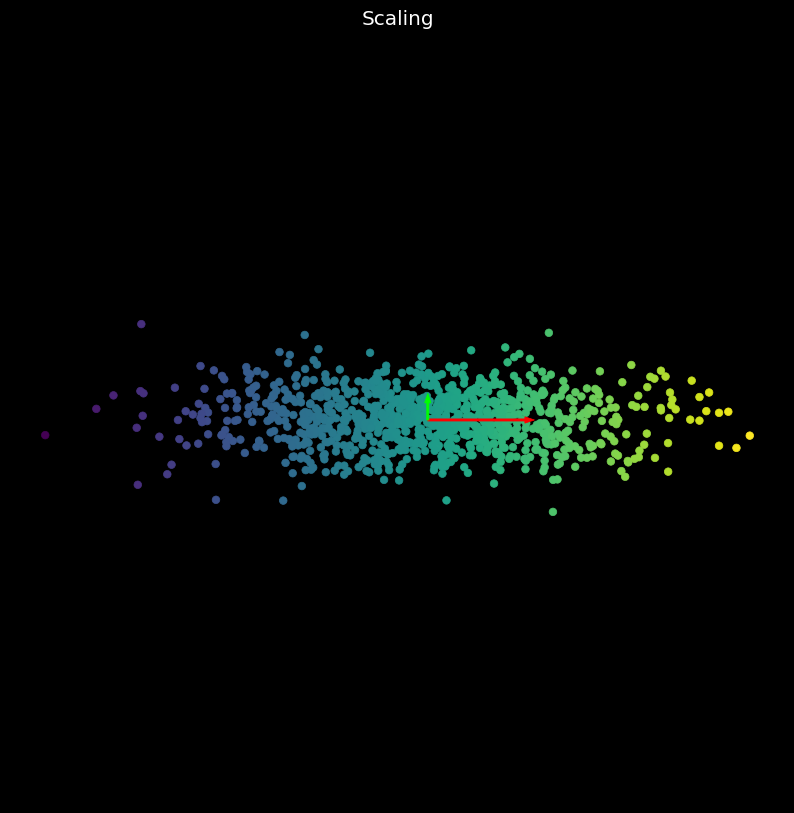

In [25]:
def scale(alpha, beta):
    return jnp.array([
        [alpha, 0],
        [0, beta]
    ], dtype=jnp.float32)

S = scale(2, 0.5)
Y = X @ S.T
OI_scaled = OI.at[2:].get() @ S.T
OI_scaled = jnp.vstack([OI[:2], OI_scaled])

show_scatterplot(Y, colors, title='Scaling')
plot_bases(OI_scaled)

### Rotation

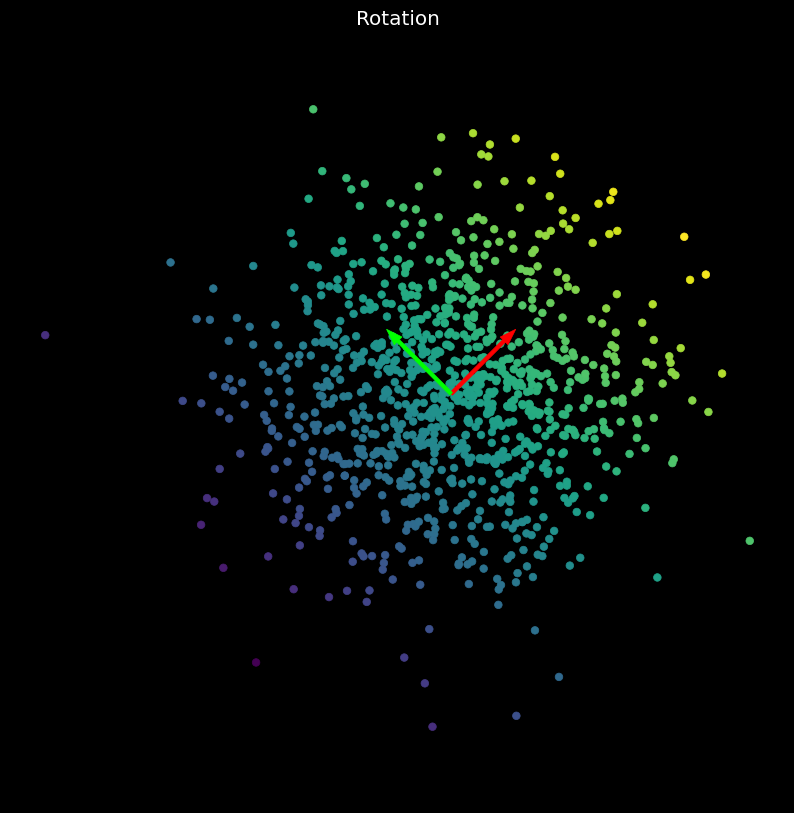

In [26]:
def rotate(theta):
    return jnp.array([
        [jnp.cos(theta), -jnp.sin(theta)],
        [jnp.sin(theta), jnp.cos(theta)]
    ], dtype=jnp.float32)

theta = jnp.pi / 4
R = rotate(theta)
Y = X @ R.T
OI_rotated = OI.at[2:].get() @ R.T
OI_rotated = jnp.vstack([OI[:2], OI_rotated])

show_scatterplot(Y, colors, title='Rotation')
plot_bases(OI_rotated)